# 5.1.3c Curvas ROC

**Propósito:** $\;$ estudiar el comportamiento de un clasificador binario $\,\hat{y}_{\tau}(\boldsymbol{x})=\mathbb{I}(p(y=1\mid\boldsymbol{x})\geq 1-\tau)\,$ en función de $\,\tau$

**Curva Receiver Operating Characteristic (ROC):** $\;$ gráfica de la $\operatorname{TPR}_{\tau}$ en función de la $\operatorname{FPR}_{\tau}$, obtenida al variar $\tau$ de $0$ a $1$

**Curvas ROC típicas:** $\;$ de dos clasificadores, A y B, siendo el A claramente mejor que el B
* **$\tau=0\,$ (esquina inferior izquierda):** $\;\operatorname{FPR}_0=\operatorname{TPR}_0=0,\,$ aunque $\operatorname{TPR}_0$ puede ser mayor que $0$
* **$\tau=1\,$ (esquina superior derecha):** $\;\operatorname{FPR}_1=\operatorname{TPR}_1=1$
* **$0<\tau<1$:** $\;$ curvas crecientes por encima de la diagonal (curva propia de un clasificador aleatorio)
    * Crecientes: $\;$ si $\tau'\leq\tau,\,$ entonces $\,\operatorname{FPR}_{\tau'}\leq\operatorname{FPR}_{\tau}\,$ y $\,\operatorname{TPR}_{\tau'}\leq\operatorname{TPR}_{\tau'}$
    * Diagonal: $\;$ si $\,p(y=1\mid\boldsymbol{x})=\operatorname{Unif}(0, 1),\,\operatorname{FPR}_{\tau}=\frac{\operatorname{FP}_{\tau}}{N}\approx\frac{N\cdot\tau}{N}=\tau\,$ y $\,\operatorname{TPR}_{\tau}=\frac{\operatorname{TP}_{\tau}}{P}\approx\frac{P\cdot\tau}{P}=\tau$

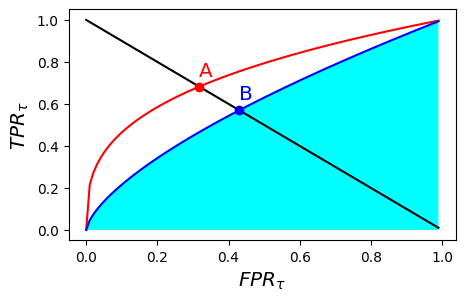

In [1]:
import numpy as np; import matplotlib.pyplot as plt
fA = np.vectorize(lambda x: x**(1.0/3)); fB = np.vectorize(lambda x: x**(2.0/3)); x = np.arange(0, 1, 0.01)
plt.figure(figsize=(5,3)); plt.plot(x, 1-x, 'k-')
plt.plot(x, fA(x), 'r-'); plt.plot(x, fB(x), 'b-'); plt.fill_between(x, fB(x), 0, facecolor='cyan')
inter_a = 0.3177; # found using scipy.optimize.fsolve(x**(1.0/3)+x-1, 0)
inter_b = 0.4302; # found using scipy.optimize.fsolve(x**(2.0/3)+x-1, 0)
plt.plot(inter_a, fA(inter_a), 'ro'); plt.plot(inter_b, fB(inter_b), 'bo')
plt.text(inter_a, fA(inter_a) + 0.05, 'A', color='red', size='x-large')
plt.text(inter_b, fB(inter_b) + 0.05, 'B', color='blue', size='x-large')
plt.xlabel(r'$FPR_{\tau}$', size='x-large'); plt.ylabel(r'$TPR_{\tau}$', size='x-large');

**Curva ROC de un clasificador ideal:** $\;$ si $p(y=1\mid\boldsymbol{x})=1$ para las muestras positivas y $0$ para las negativas; la curva ROC es en realidad una recta que va de la esquina superior izquierda ($\tau=0$) a la superior derecha ($\tau=1$)
$$\begin{align*}
\operatorname{FPR}_0&=\frac{\operatorname{FP}_0}{N}=\frac{0}{N}=0&&&
\operatorname{TPR}_0&=\frac{\operatorname{TP}_0}{P}=\frac{P}{P}=1\\
\operatorname{FPR}_1&=\frac{\operatorname{FP}_1}{N}=\frac{N}{N}=1&&&
\operatorname{TPR}_1&=\frac{\operatorname{TP}_1}{P}=\frac{P}{P}=1%
\end{align*}$$

## Resumen mediante un escalar

**Propósito:** $\;$ resumir una curva ROC mediante algún escalar para facilitar su comparación con otras curvas

**Área bajo la curva (AUC, area under curve):** $\;$ por ejemplo, el área azul para el clasificador B de la figura

**Equal error rate (EER) o cross-over rate:** $\;$ valor de $\tau$ tal que $\operatorname{FPR}_{\tau}=\operatorname{FNR}_{\tau}=1-\operatorname{TPR}_{\tau}$, esto es, punto en el que la curva cruza la diagonal de la esquina superior izquierda a la inferior derecha; por ejemplo, en la figura se observa que la EER de A (rojo) es mejor (menor) que la de B (azul)

## Clases desequilibradas

**Ejemplo:** $\;$ en recuperación de información, tenemos muchos más negativos (documentos irrelevantes) que positivos (relevantes)

**Efecto sobre la curva:** $\;$ ninguno, ya que la TPR y FPR son fracciones de positivos y negativos, respectivamente

**Consecuencia práctica:** $\;$ un pequeño aumento de FPR supone un gran número de falsos positivos adicionales, cosa que no tiene interés práctico, por lo que la curva ROC solo tiene interés para valores pequeños de FPR